<div style="text-align: center">
    <h1>Homework 1 (Implementation)</h1> 
    <h2>Data Mining Course</h2> 
    <h4>Amirhossein Alibakhshi</h4> 
    <h6>(9731096)</h6> 
</div>

---
# Importing Libraries 📚

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, compose, decomposition
pd.options.mode.chained_assignment = None

# Reading From the Dataset 📖

In [2]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
numeric_features = features[:4]
data = pd.read_csv('./iris.data', names=features)
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
156,6.5,3.0,5.2,2.0,NaN
157,6.2,3.4,5.4,2.3,Iris-virginica


---

# 1. Handling Missing Values 🔎 

## 1.1 Finding NaN Data in Dataset 🕵️

- `False` : Valid Data
- `True`: NaN Data

In [3]:
data.isna()

,sepal_length,sepal_width,petal_length,petal_width,target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
154,False,False,False,False,False
155,False,False,False,False,False
156,False,False,False,False,True
157,False,False,False,False,False


Here we can see the NaNs in our dataset:

In [4]:
data[data['sepal_length'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
73,NaN,2.2,4.5,1.5,Iris-versicolor
143,NaN,3.0,6.1,2.3,Iris-virginica


In [5]:
data[data['sepal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target


In [6]:
data[data['petal_length'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
20,5.4,3.9,NaN,1.7,Iris-setosa
87,5.5,2.4,NaN,NaN,Iris-versicolor


In [7]:
data[data['petal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
6,5.4,3.9,1.7,NaN,Iris-setosa
27,5.0,3.0,1.6,NaN,Iris-setosa
87,5.5,2.4,NaN,NaN,Iris-versicolor


In [8]:
data[data['target'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,target
60,6.3,3.3,4.7,1.6,NaN
139,6.2,3.4,5.4,2.0,NaN
156,6.5,3.0,5.2,2.0,NaN


## 1.2 Removing Invalid Data Using `dropna()` 🚮

> After calling this method, **9** invalid rows will be removed.

In [9]:
clean_data = data.dropna(how="any")
clean_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,Iris-virginica
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
157,6.2,3.4,5.4,2.3,Iris-virginica


---

# 2. Handling Nomial Data 📜 

## 2.1 Label Encoding (in `target` column) 🏷️

### Table 📅

| Nomial Value  | Numeric Value |
|---------------|---------------|
|Iris-setosa    | 0             |
|Iris-versicolor| 1             |
|Iris-virginica | 2             |

### Disadvantages 🔴

We have encoded a set of nominal data into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows. The problem here is, since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all.

In [10]:
label_encoded_data = clean_data
label_encoder = preprocessing.LabelEncoder()
label_encoded_data['target'] = label_encoder.fit_transform(label_encoded_data['target'])
label_encoded_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


## 2.2 One Hot Encoding 🌶️

### Description 📝

What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. In our example, we’ll get three new columns, one for each category  — `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`.

### Table 📅


| Nomial Value  | t0  | t1  | t2  |
|---------------|-----|-----|-----|
|Iris-setosa    | 1   | 0   | 0   |
|Iris-versicolor| 0   | 1   | 0   |
|Iris-virginica | 0   | 0   | 1   |
    

### Example ✍️

In [11]:
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoder_values = one_hot_encoder.fit_transform(clean_data.target.values.reshape(-1,1)).toarray()

one_hot_encoder_data = pd.DataFrame(
    np.concatenate(
        [
            np.array(clean_data).reshape((-1, 5))[:,:4],
            one_hot_encoder_values
        ],
        axis=1
    ), 
    columns=numeric_features+["t{}".format(str(int(i))) for i in range(3)]
) 
one_hot_encoder_data

,sepal_length,sepal_width,petal_length,petal_width,t0,t1,t2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


---

# 3. Normalization 🔔

## 3.1 Bofore Normalization 🔴

In [12]:
label_encoded_data[numeric_features].var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [13]:
label_encoded_data[numeric_features].mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

## 3.2 Normalizing Data Using `StandardScaler` 🟢

In [14]:
scaler = preprocessing.StandardScaler()

column_transformer = compose.ColumnTransformer(
    [
        (
            'somename', 
            scaler, 
            numeric_features
        )
    ], remainder='passthrough'
)

scaled_data = pd.DataFrame(
    data=column_transformer.fit_transform(label_encoded_data), 
    columns=features
)
scaled_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,0.0
1,-1.143017,-0.124958,-1.341272,-1.312977,0.0
2,-1.385353,0.337848,-1.398138,-1.312977,0.0
3,-1.506521,0.106445,-1.284407,-1.312977,0.0
4,-1.021849,1.263460,-1.341272,-1.312977,0.0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2.0
146,0.553333,-1.281972,0.705893,0.922064,2.0
147,0.795669,-0.124958,0.819624,1.053537,2.0
148,0.432165,0.800654,0.933356,1.447956,2.0


In [15]:
scaled_data[numeric_features].var()

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
dtype: float64

In [16]:
scaled_data[numeric_features].mean()

sepal_length   -2.775558e-16
sepal_width    -5.140333e-16
petal_length    1.154632e-16
petal_width     9.251859e-16
dtype: float64

---

# 4. Principal Component Analysis (PCA) 🗜️

In [17]:
pca = decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_data =  pd.DataFrame(data=principal_components, columns=['x', 'y'])
pca_data = pd.concat([pca_data, scaled_data[['target']]], axis=1)
pca_data

,x,y,target
0,-2.476965,0.500585,0.0
1,-2.313886,-0.659120,0.0
2,-2.567994,-0.324384,0.0
3,-2.509251,-0.580856,0.0
4,-2.588980,0.668663,0.0
...,...,...,...
145,2.118469,0.385062,2.0
146,1.835538,-0.904895,2.0
147,1.800721,0.266694,2.0
148,1.673850,1.014595,2.0


---

# 5. Visualization 🎨 

## 5.1 Scatter Plot 📈

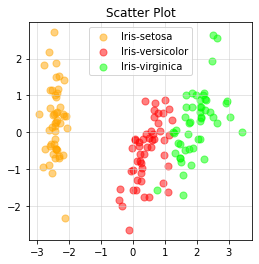

In [18]:
get_label_info = {
    0: {
        'name': 'Iris-setosa',
        'color':'orange'
    },
    1: {
        'name': 'Iris-versicolor',
        'color':'red'
    },
    2: {
        'name': 'Iris-virginica',
        'color':'lime'
    },
}

fig, ax = plt.subplots(figsize=(4,4))
for label in [0, 1, 2]:
    category_indexes = np.where(np.array(label_encoded_data)[:,4] == label)
    ax.scatter(
        principal_components[category_indexes, 0], 
        principal_components[category_indexes, 1], 
        c=get_label_info[label]['color'], 
        label=get_label_info[label]['name'],
        alpha=0.5,
        s=50
    )
plt.title('Scatter Plot')
plt.grid(color='#ccc', linestyle='-', linewidth=0.5)
ax.legend()
plt.show()

## 5.2 Boxplot 📦

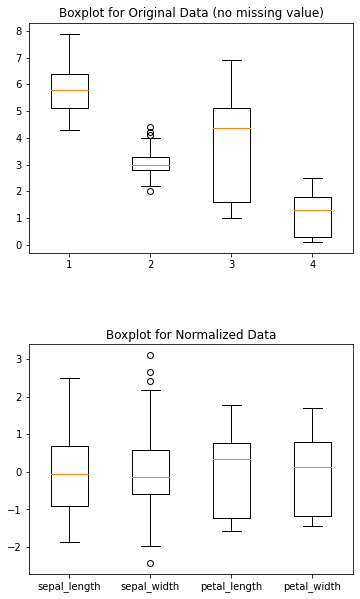

In [35]:
fig, ax = plt.subplots(2, 1)
ax[0].boxplot([np.array(label_encoded_data)[:,i] for i in range(4)])
ax[0].set_title("Boxplot for Original Data (no missing value)")

ax[1].boxplot([np.array(scaled_data)[:,i] for i in range(4)])
ax[1].set_title("Boxplot for Normalized Data")

fig.subplots_adjust(
    left=0.08, 
    right=0.98, 
    bottom=0.05, 
    top=0.9,
    hspace=0.4, 
    wspace=0.3
)

plt.xticks(range(1,5), numeric_features)
fig.set_size_inches(5, 9)
plt.show()